# <p style="background-color:#006D77;font-family:newtimeroman;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">Proyecto Clustering Clientes SuperMarket</p>
---

[![Clustering-numpy.png](https://i.postimg.cc/3Nh5ZW6t/Clustering-numpy.png)](https://postimg.cc/wywGqx9N)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#sec_1">Introducción</a>  
2. <a href="#sec_2">Exploración del set de datos</a>  
3. <a href="#sec_3">Análisis de los datos</a>  
4. <a href="#sec_4">Limpieza del set de datos</a>  
5. <a href="#sec_5">Pre-selección de variables</a>  
6. <a href="#sec_6">Conclusiones y Recomendaciones</a>     

 
</font>
</div>

<a id='sec_1'></a>
## `1. Introducción`
`🔍 Segmentación Inteligente de Clientes  🔍` 

- En el dinámico mundo del comercio y los servicios, cada cliente es único y tiene sus propias necesidades, preferencias y comportamientos. 🛍️ Nuestro proyecto se enfoca en analizar un conjunto de datos detallado de clientes para identificar patrones y características clave que nos permitan agruparlos de manera eficiente. A través de técnicas avanzadas de clustering 🔗, exploramos atributos como el historial de compras 💳, y la edad de los clientes 📢

- Con esta segmentación, buscamos crear perfiles de clientes que permitan personalizar ofertas, mejorar la experiencia del cliente y optimizar las estrategias de marketing. 🎯 Cada grupo de clientes tiene una historia que contar, y nuestro análisis nos ayuda a entenderla mejor, proporcionando una ventaja competitiva en el mercado. 📈✨

**1.2. Recursos disponibles**
- [Set de datos en tipo numpy](Data/dataset.npy)

**1.3. Diccionario de datos disponibles**
| **Clave** | **Descripción** | **Tipo de dato** |
|---|---|---|
| Edad | Edad de las personas | Int |
| Nivel de Compras | Nivel de comppras en dolares | Float |

<a id='sec_2'></a>
## `2. Exploración del set de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Verificar si hay datos faltantes y valores duplicados

**2.1. Leer el set de datos**

In [507]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [508]:
data = np.load('Data/dataset.npy')
df = pd.DataFrame(data, columns=['Edad','Nivel_Compra'])
df

,Edad,Nivel_Compra
0,38.0,850.266397
1,35.0,605.393766
2,32.0,1289.277340
3,39.0,1289.682865
4,38.0,871.743748
...,...,...
368,70.0,1531.964604
369,60.0,1315.968541
370,67.0,1386.208622
371,55.0,1524.478771


**2.2. Entender tamaño, columnas y filas del set de datos**

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad          373 non-null    float64
 1   Nivel_Compra  369 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


>**Observación**
>- Se puede observar que se tiene `373 filas` y `2 columnas`

**2.3. Entender qué tipos de datos tenemos en cada columna**

In [510]:
df.dtypes

Edad            float64
Nivel_Compra    float64
dtype: object

>**Observación**
>- Se puede observar que se tiene datos de tipos `float`

**2.4. Verificar si hay datos faltantes y valores duplicados**

In [511]:
df.isnull().sum()

Edad            0
Nivel_Compra    4
dtype: int64

>**Observación**
>- Se puede observar que se tiene valores de tipo `nan`

In [512]:

df.duplicated().sum()

1

>**Observación**
> - Al observar se pudo evidenciar que si hay `valores duplicados`

In [513]:
df = df.drop_duplicates()

In [514]:
df.duplicated().sum()

0

>**Observación**
> - Al observar se pudo evidenciar que ya no hay `valores duplicados`

<a id='sec_3'></a>
## `3. Análisis de los datos`

En este caso debemos de analis nuestros datos para poder analizar en caso halla valores atipicos

Etapas de Análisis de los datos:

1. Visualizar distribución de los datos

**3.1. Visualizar distribución de los datos**

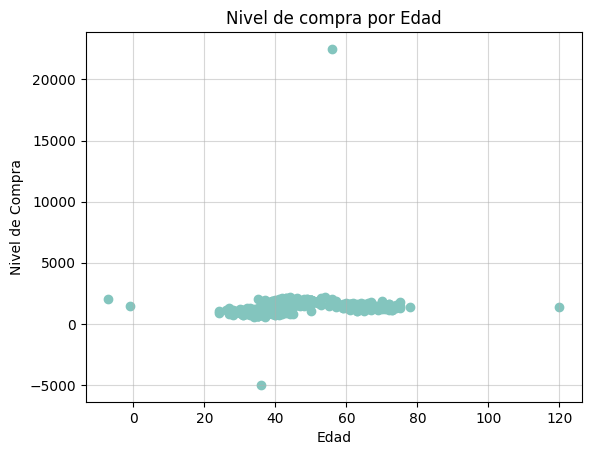

In [515]:
plt.scatter(x = df['Edad'], y = df['Nivel_Compra'], color = '#83C5BE')
plt.ylabel('Nivel de Compra')
plt.xlabel('Edad')
plt.title('Nivel de compra por Edad')
plt.grid(True, alpha = 0.5);

>**Observación**
> - Al observar se pudo evidenciar que ya se tienen `valores outliers` tanto para la variable de `edad` y `nivel de compra`
> - Algunas `edades` son negativas o incluso llegan a ser de 120 años
> - Algunos `niveles de compra` son negativas o incluso sobrepsan el nivel máximo de a mayoría de los datos

In [516]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribución de Edad", "Distribución de Nivel de Compra"))
fig.add_trace(go.Box(y=df['Edad'], name='Edad'), row=1, col=1)
fig.add_trace(go.Box(y=df['Nivel_Compra'], name='Nivel de Compra'), row=1, col=2)
fig.update_layout(
    title={
        'text': "Boxplots de Edad y Nivel de Compra",
        'x': 0.5,  # Centro (0.5)
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=False
)
fig.show()

>**Observación**
> - Se puede observar en el `gráfico de Edad` que se tiene valores negativos de `-1 y -7` y alas vez una edad de `120` las cuales deben ser eliminadas o tratadas, según sea conveniente
> - Se puede observar en el `gráfico de Nivel` de compra que hay valor de `-5000` y valores mayores a `20000` las cuales deben ser eliminadas o tratadas, según sea conveniente

<a id='sec_4'></a>
## `4. Limpieza del set de datos`

En esta etapa debemos de realizar a limpieza de missings y outliers, antes de usar nuestro modelo de K-Means.

Etapas de la limpieza del set de datos:

1. Tratamiento de Outlliers
2. Tratamiento de Missings 

**4.1.Tratamiento de Outlliers mediante**

>**Observación**
>- En el caso de la `edad` que son `negativos` y `menos a 18` vamos a eliminaro ya que por naturaleza no existen edades negativos y no tengos información de los registros historicos
>- En el caso de la `edad` que es `120` tambien vamos a eliminarlo ya que es e unico outiers con un edad de 120 años

*Gráfica con outliers en Edad*

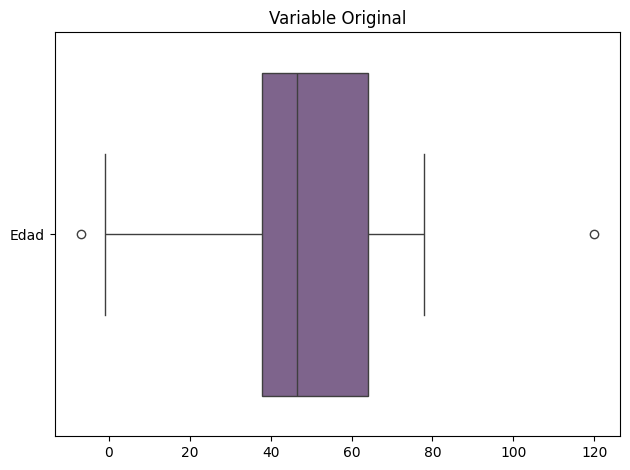

In [517]:
sns.boxplot(data = df[['Edad']], orient="h", color = '#805D93')
plt.title('Variable Original')
plt.tight_layout();

In [518]:
df['Edad'].loc[(df['Edad']< 18) |(df['Edad']> 90) ].index.tolist()

[127, 201, 273]

In [519]:
df = df.drop(index=[127, 201, 273])

*Gráfica sin outliers*

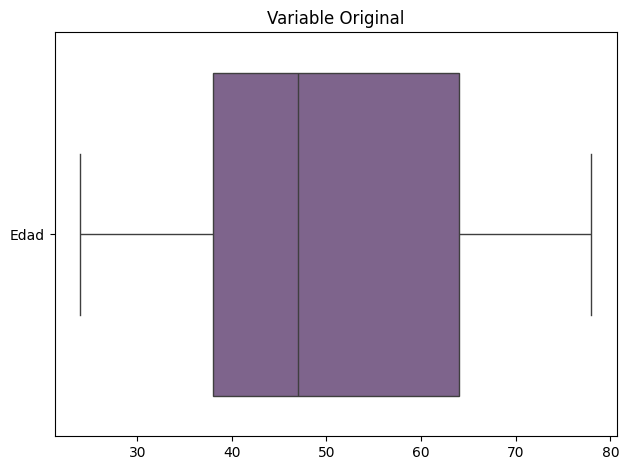

In [520]:
sns.boxplot(data = df[['Edad']], orient="h", color = '#805D93')
plt.title('Variable Original')
plt.tight_layout()
plt.show();

*Gráfica con outliers en Nivel de compra*

>**Observación**
>- En el caso del `nivel de compra` vamos a eliminar las compras menores a 0 ya que no existen valores negativos en y de la misma nivels de compras mayores a 5000

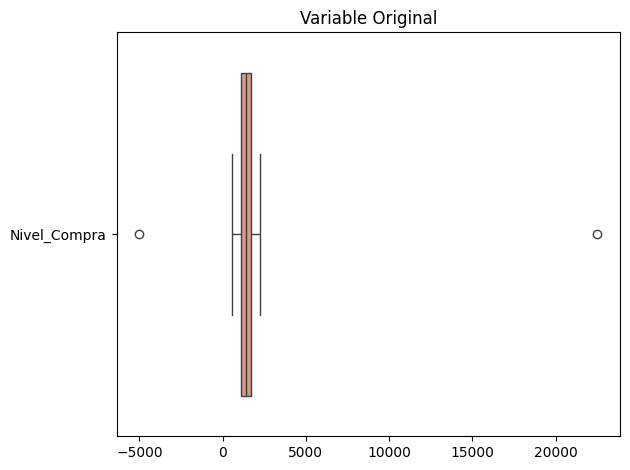

In [521]:
sns.boxplot(data = df[['Nivel_Compra']], orient="h", color = '#E29578')
plt.title('Variable Original')
plt.tight_layout();

In [522]:
df['Nivel_Compra'].loc[(df['Nivel_Compra']< 0) |(df['Nivel_Compra']> 5000) ].index.tolist()

[105, 301]

In [523]:
df = df.drop(index=[105, 301])

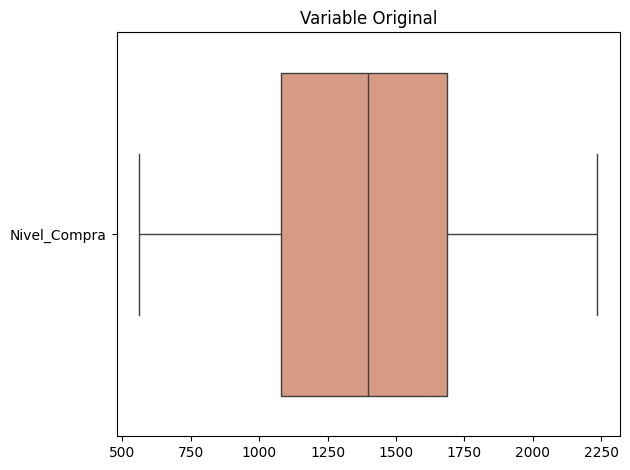

In [524]:
sns.boxplot(data = df[['Nivel_Compra']], orient="h", color = '#E29578')
plt.title('Variable Original')
plt.tight_layout();

>**Obervación**
>- Se puede observar que ya nose  se cuenta con valores outiers en ambas columnas de `edad` y `nivel de compra`

**4.1.Imputación de Missings**

- Al momento de recolectar los datos es posible que no se haya recolectado la totalidad de la información (edad, nivel de compra) para cada cliente.
En estos casos es probable que algunos elementos del set de datos no contengan cantidades numéricas y en su lugar tengan datos tipo `NaN` (`Not A Number`).
- En este eventual caso debemos de imputar mediante `tenicas estadistica de tendencia central` como lo es la `mediana` que pertenece a la `imputación simple`

[![tenicas-imputaci-n.png](https://i.postimg.cc/jjPp1TQv/tenicas-imputaci-n.png)](https://postimg.cc/v1821pK6)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 372
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad          367 non-null    float64
 1   Nivel_Compra  364 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [526]:
actual_features = df.columns.to_list()
actual_features

['Edad', 'Nivel_Compra']

In [527]:
df[[x + '_imp' for x in actual_features]] = df[actual_features].fillna(df[actual_features].median())

In [528]:
df

,Edad,Nivel_Compra,Edad_imp,Nivel_Compra_imp
0,38.0,850.266397,38.0,850.266397
1,35.0,605.393766,35.0,605.393766
2,32.0,1289.277340,32.0,1289.277340
3,39.0,1289.682865,39.0,1289.682865
4,38.0,871.743748,38.0,871.743748
...,...,...,...,...
368,70.0,1531.964604,70.0,1531.964604
369,60.0,1315.968541,60.0,1315.968541
370,67.0,1386.208622,67.0,1386.208622
371,55.0,1524.478771,55.0,1524.478771


>**Observación**
>- Se puede observar que ya no se tiene `valores Nan` y se ha completando mediante la `mediana` de cada columna y ala vez se a creado una columna con la extensión `_imp`